# Present statistics for all images
This script loads the image statistics files, that have been created with ***extract_image_statistics.py*** file and displays their content. Also it aggregates the statistics for eachband. 

In [17]:
import pickle
import pandas as pd
from satimg_utils.img_proc_utils import *

In [18]:
# set the root data directory
root_data_dir = "../../Data"
sat_img_dir = f"{root_data_dir}/satellite_imgs"

In [19]:
# start with Raw Landsat images
data_type = 'LS'
band_name_dict = dict(zip(list(range(7)),['Red', 'Green', 'Blue', 'NIR',
                                          'SWIR1', 'SWIR2', 'Temp']))
pth = f"{sat_img_dir}/{data_type}/{data_type}_raw_img_stats.pkl"
with open(pth, 'rb') as f:
  ls_raw_stats = pickle.load(f)

print_band_quality(ls_raw_stats, band_name_dict)

print("\n")

# print the number of images that are affected by at least one NA pixel in the Blue Channel
print(f"Number of images affected by NA pixels in the Blue channel {sum(ls_raw_stats[2]['n_na'] > 0)}")

# which country year pairs are most affected?
aux = ls_raw_stats[2].copy()
aux['country'] = [i[:3] for i in aux['unique_id']]
aux['year'] = [i[-4:] for i in aux['unique_id']]
aux = aux.loc[aux['n_na']>0].reset_index(drop = True)
print('\nNumber of images affected by NAs by country year')
print(pd.crosstab(aux['year'], aux.country))

##  Aggregate the statistics
print('\nAggregate statistics')
summary_band_stats_all = aggregate_band_stats(ls_raw_stats, flagged_ids = [])
print_band_summary(summary_band_stats_all, band_name_dict)



Band Red sum of NA pixels: 1104153
Band Red number of images with NA pixels: 628
Band Red mean number of NA pixels: 154.6216216216216

Band Green sum of NA pixels: 1104153
Band Green number of images with NA pixels: 628
Band Green mean number of NA pixels: 154.6216216216216

Band Blue sum of NA pixels: 1104156
Band Blue number of images with NA pixels: 628
Band Blue mean number of NA pixels: 154.62204173085001

Band NIR sum of NA pixels: 1104153
Band NIR number of images with NA pixels: 628
Band NIR mean number of NA pixels: 154.6216216216216

Band SWIR1 sum of NA pixels: 1104153
Band SWIR1 number of images with NA pixels: 628
Band SWIR1 mean number of NA pixels: 154.6216216216216

Band SWIR2 sum of NA pixels: 15535729
Band SWIR2 number of images with NA pixels: 1504
Band SWIR2 mean number of NA pixels: 2175.567707603977

Band Temp sum of NA pixels: 1141156
Band Temp number of images with NA pixels: 817
Band Temp mean number of NA pixels: 159.8033888811091


Number of images affected 

In [20]:
# Median Landsat images
band_name_dict = dict(zip(list(range(6)), ['Red', 'Green', 'Blue', 'NIR','SWIR1', 'Temp']))

pth = f"{sat_img_dir}/{data_type}/{data_type}_median_img_stats.pkl"
with open(pth, 'rb') as f:
  ls_median_stats = pickle.load(f)

print_band_quality(ls_median_stats, band_name_dict)

##  Aggregate the statistics
print('\nAggregate statistics')
summary_band_stats_all = aggregate_band_stats(ls_median_stats, flagged_ids = [])
print_band_summary(summary_band_stats_all, band_name_dict)



Band Red sum of NA pixels: 0
Band Red number of images with NA pixels: 0
Band Red mean number of NA pixels: 0.0

Band Green sum of NA pixels: 0
Band Green number of images with NA pixels: 0
Band Green mean number of NA pixels: 0.0

Band Blue sum of NA pixels: 0
Band Blue number of images with NA pixels: 0
Band Blue mean number of NA pixels: 0.0

Band NIR sum of NA pixels: 0
Band NIR number of images with NA pixels: 0
Band NIR mean number of NA pixels: 0.0

Band SWIR1 sum of NA pixels: 0
Band SWIR1 number of images with NA pixels: 0
Band SWIR1 mean number of NA pixels: 0.0

Band Temp sum of NA pixels: 0
Band Temp number of images with NA pixels: 0
Band Temp mean number of NA pixels: 0.0

Aggregate statistics
0:	 min:-0.00994	 max:1.05198	 mean:0.10186	 std:0.04780	Red
1:	 min:0.00626	 max:0.93787	 mean:0.08823	 std:0.03049	Green
2:	 min:-0.04209	 max:0.98074	 mean:0.05847	 std:0.02255	Blue
3:	 min:-0.00764	 max:0.91915	 mean:0.25746	 std:0.06083	NIR
4:	 min:0.00196	 max:1.60221	 mean:0

In [21]:
# Dynamic RS V2 images
data_type = 'RS_v2'
print("DYNAMIC RS V2 IMAGES")
band_name_dict = dict(zip(list(range(4)), ['Nightlights', 'ndvi', 'ndwi_gao', 'ndwi_mcf']))

pth = f"{sat_img_dir}/{data_type}/{data_type}_dynamic_img_stats.pkl"
with open(pth, 'rb') as f:
    rs_dynamic_stats = pickle.load(f)

print_band_quality(rs_dynamic_stats, band_name_dict)

##  Aggregate the statistics
print('\nAggregate statistics')
summary_band_stats_all = aggregate_band_stats(rs_dynamic_stats, flagged_ids = [])
print_band_summary(summary_band_stats_all, band_name_dict)


DYNAMIC RS V2 IMAGES

Band Nightlights sum of NA pixels: 0
Band Nightlights number of images with NA pixels: 0
Band Nightlights mean number of NA pixels: 0.0

Band ndvi sum of NA pixels: 0
Band ndvi number of images with NA pixels: 0
Band ndvi mean number of NA pixels: 0.0

Band ndwi_gao sum of NA pixels: 0
Band ndwi_gao number of images with NA pixels: 0
Band ndwi_gao mean number of NA pixels: 0.0

Band ndwi_mcf sum of NA pixels: 0
Band ndwi_mcf number of images with NA pixels: 0
Band ndwi_mcf mean number of NA pixels: 0.0

Aggregate statistics
0:	 min:0.00000	 max:3.78735	 mean:0.01416	 std:0.05343	Nightlights
1:	 min:-0.34757	 max:0.64521	 mean:0.28809	 std:0.09653	ndvi
2:	 min:-0.19099	 max:0.50191	 mean:0.10551	 std:0.07576	ndwi_gao
3:	 min:-0.57991	 max:0.40066	 mean:-0.29681	 std:0.09647	ndwi_mcf


(array([5.848e+03, 4.100e+02, 2.470e+02, 1.330e+02, 1.430e+02, 9.800e+01,
        6.200e+01, 3.400e+01, 5.100e+01, 4.400e+01, 3.900e+01, 5.000e+00,
        1.100e+01, 8.000e+00, 2.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([0.        , 0.07574704, 0.15149409, 0.22724114, 0.30298817,
        0.37873524, 0.45448229, 0.53022933, 0.60597634, 0.68172342,
        0.75747049, 0.8332175 , 0.90896457, 0.98471159, 1.06045866,
        1.13620567, 1.21195269, 1.28769982, 1.36344683, 1.43919384,
        1.51494098, 1.59068799, 1.666435  , 1.74218202, 1.81792915,
        1.89367616, 1.96942317, 2.04

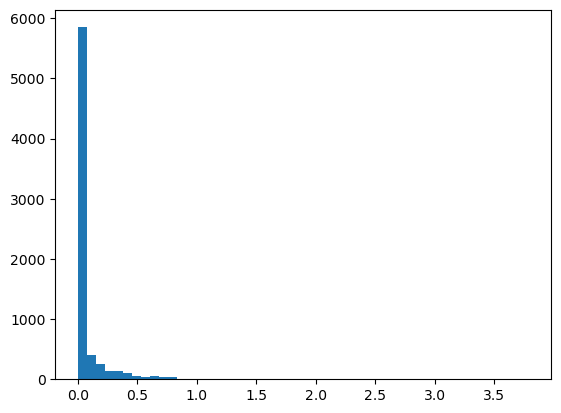

In [22]:
plt.hist(rs_dynamic_stats[0]['max'], bins = 50)
#plt.vlines(x = 63, ymin = 0, ymax = 5500, color = 'red')
#plt.show()

In [17]:
# Mean RS V2 mean images
print("MEAN RS V2 IMGAES")
pth = f"{sat_img_dir}/{data_type}/{data_type}_mean_img_stats.pkl"
with open(pth, 'rb') as f:
    rs_mean_stats = pickle.load(f)

print_band_quality(rs_mean_stats, band_name_dict)

##  Aggregate the statistics
print('\nAggregate statistics')
summary_band_stats_all = aggregate_band_stats(rs_mean_stats, flagged_ids = [])
print_band_summary(summary_band_stats_all, band_name_dict)


MEAN RS V2 IMGAES

Band Nightlights sum of NA pixels: 0
Band Nightlights number of images with NA pixels: 0
Band Nightlights mean number of NA pixels: 0.0

Band ndvi sum of NA pixels: 0
Band ndvi number of images with NA pixels: 0
Band ndvi mean number of NA pixels: 0.0

Band ndwi_gao sum of NA pixels: 0
Band ndwi_gao number of images with NA pixels: 0
Band ndwi_gao mean number of NA pixels: 0.0

Band ndwi_mcf sum of NA pixels: 0
Band ndwi_mcf number of images with NA pixels: 0
Band ndwi_mcf mean number of NA pixels: 0.0

Aggregate statistics
0:	 min:0.00000	 max:238.44360	 mean:1.51360	 std:5.02827	Nightlights
1:	 min:-0.31044	 max:0.61804	 mean:0.28132	 std:0.09204	ndvi
2:	 min:-0.15817	 max:0.45781	 mean:0.09623	 std:0.07360	ndwi_gao
3:	 min:-0.56016	 max:0.37684	 mean:-0.29378	 std:0.09551	ndwi_mcf


In [14]:
# Static RS V2 images
print("STATIC RS V2 IMAGES")
band_name_dict = dict(zip(list(range(4)), ['wsf', 'esa_lc']))

pth = f"{sat_img_dir}/{data_type}/{data_type}_static_img_stats.pkl"
with open(pth, 'rb') as f:
    rs_static_stats = pickle.load(f)

print_band_quality(rs_static_stats, band_name_dict)

##  Aggregate the statistics
print('\nAggregate statistics')
summary_band_stats_all = aggregate_band_stats(rs_static_stats, flagged_ids = [])
print_band_summary(summary_band_stats_all, band_name_dict)


STATIC RS V2 IMAGES

Band wsf sum of NA pixels: 0
Band wsf number of images with NA pixels: 0
Band wsf mean number of NA pixels: 0.0

Band esa_lc sum of NA pixels: 0
Band esa_lc number of images with NA pixels: 0
Band esa_lc mean number of NA pixels: 0.0

Aggregate statistics
0:	 min:0.00000	 max:1.00000	 mean:0.17863	 std:0.38304	wsf
1:	 min:10.00000	 max:95.00000	 mean:32.22213	 std:17.87670	esa_lc
